### Import necessary libraries

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
# use cv2 to read image
import cv2
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Load data

In [ ]:
!cp /content/drive/MyDrive/Computer_Vision/DataSet/Dataset.zip .
!unzip Dataset.zip -d dataset

In [ ]:
def load_data(path):
  samples = []
  letters = []
  for folder in glob.glob(path+'/*'):
    label = folder.split('/')[3]
    # convert label from str to int
    label = ord(label)-ord('A')
    for images in glob.glob(folder+'/*'):
      img = cv2.imread(images)
      # convert img into grayscale
      img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      # here it's important to use flatten to reduce one dim
      img_gray = np.reshape(img_gray, (1024,-1)).flatten()
      samples.append(img_gray)
      letters.append(label)
  return np.array(samples), np.array(letters)

In [ ]:
path = "/content/dataset"
samples, letters = load_data(path)

Construct training, validation, and test data

In [ ]:
# split dataset
x_train, x_test, y_train, y_test = train_test_split(
  samples, letters, test_size=0.1, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(
  x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255
x_test /= 255
x_val /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_val.shape[0], 'val samples')

2189 train samples
305 test samples
548 val samples


In [ ]:
num_classes = 3
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [ ]:
x_train.shape

(2189, 1024)

In [ ]:
y_train.shape

(2189, 3)

Build MLP Model

Here, compared to less neurons, if we increase the number of neurons at evch layer and increase the number of epoches, we can get a better result.


In [ ]:
model = Sequential()
# Increase the number of neurons
model.add(Dense(400, input_dim=1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(300, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               410000    
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               120300    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 903       
Total params: 621,503
Trainable params: 621,503
Non-trainable params: 0
__________________________________________________

### Train model

In [ ]:
epochs =10
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val)
                    )
score = model.evaluate(x_val, y_val, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Epoch 1/10
69/69 [==============================] - 1s 8ms/step - loss: 0.3351 - accuracy: 0.8862 - val_loss: 0.1801 - val_accuracy: 0.9507
Epoch 2/10
69/69 [==============================] - 1s 8ms/step - loss: 0.3193 - accuracy: 0.8940 - val_loss: 0.3495 - val_accuracy: 0.8960
Epoch 3/10
69/69 [==============================] - 1s 7ms/step - loss: 0.3291 - accuracy: 0.8894 - val_loss: 0.2292 - val_accuracy: 0.9325
Epoch 4/10
69/69 [==============================] - 1s 7ms/step - loss: 0.3075 - accuracy: 0.9032 - val_loss: 0.1544 - val_accuracy: 0.9526
Epoch 5/10
69/69 [==============================] - 1s 7ms/step - loss: 0.3163 - accuracy: 0.8867 - val_loss: 0.1771 - val_accuracy: 0.9434
Epoch 6/10
69/69 [==============================] - 1s 8ms/step - loss: 0.2964 - accuracy: 0.9013 - val_loss: 0.4411 - val_accuracy: 0.8139
Epoch 7/10
69/69 [==============================] - 1s 7ms/step - loss: 0.2837 - accuracy: 0.8968 - val_loss: 0.5140 - val_accuracy: 0.8066
Epoch 8/10
69/69 [==

### Plot Accuracy and Loss


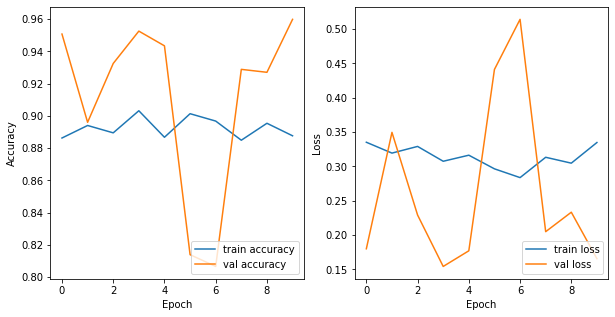

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

### Predict some results

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#predict test data
y_pred= model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


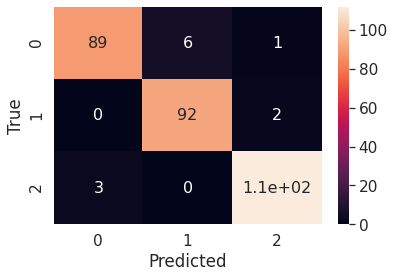

In [ ]:
# Draw confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(3), range(3))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Save model 

In [ ]:
model_json = model.to_json()
with open("MLPmodel.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("MLPmodel_weights.h5")
print("Saved model to disk") 

Saved model to disk


### Load model


In [ ]:
from keras.models import model_from_json

# load json and create model
json_file = open('/content/MLPmodel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("MLPmodel_weights.h5")

### Prediction

In [ ]:
from google.colab.patches import cv2_imshow

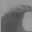

In [ ]:
image = cv2.imread("/content/dataset/C/10.jpg")
cv2_imshow(image)

In [ ]:
hand_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hand_image = np.reshape(hand_image,(1,1024))
hand_image.shape

(1, 1024)

In [ ]:
prediction = loaded_model.predict(hand_image) # where hand_image is the probability image of your hand of size (1,1024)
prediction = prediction.argmax()
predicted_letter = chr(ord('A') + prediction)
predicted_letter

'C'